# VGG Architecture

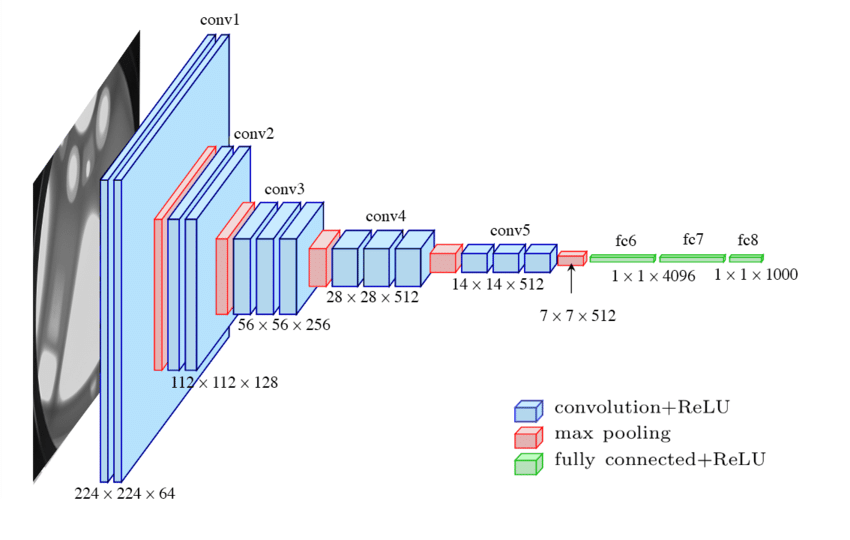

### What do layers learn
- Early Layers are able to detect simple features, like corners, edges and simple textures.
- Intermediate Layers are able to detect more abstract patterns, like contours, shapes and textures.
- Deeper Layers represent high level semantic features, responding selectively to object categories or significant parts.

### Testing the Architecture

Subset dataset will be Food101 Dataset.

4 different classes:
1. Sushi
2. Cup-Cakes
3. Macarons
4. Chocolate Cake

In [19]:
import torch
from torch import nn

In [20]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [21]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'food_images'

if image_path.is_dir():
    print(f"{image_path} already exists")
else:
    print(f"{image_path} does not exist")
    image_path.mkdir(parents=True, exist_ok=True)

with open(data_path/"food_images.zip", 'wb') as f:
    request = requests.get("https://programmingoceanacademy.s3.ap-southeast-1.amazonaws.com/image_classification_dataset.zip")
    print('Downloading images...')
    f.write(request.content)

with zipfile.ZipFile(data_path / "food_images.zip", 'r') as zip_ref:
    print("Unzipping food images...")
    zip_ref.extractall(image_path)

data/food_images already exists
Unzipping food images...


In [22]:
import os

os.remove("/Users/user/code/vh-learning-playground/data/food_images.zip")

In [23]:
train_dir = image_path / "dataset/train"
test_dir = image_path / "dataset/test"

In [24]:
train_dir, test_dir

(PosixPath('data/food_images/dataset/train'),
 PosixPath('data/food_images/dataset/test'))

In [25]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)

There are 1 directories and 0 images in data/food_images
There are 2 directories and 0 images in data/food_images/dataset
There are 4 directories and 0 images in data/food_images/dataset/test
There are 0 directories and 75 images in data/food_images/dataset/test/cup_cakes
There are 0 directories and 75 images in data/food_images/dataset/test/macarons
There are 0 directories and 75 images in data/food_images/dataset/test/sushi
There are 0 directories and 75 images in data/food_images/dataset/test/chocolate_cake
There are 4 directories and 0 images in data/food_images/dataset/train
There are 0 directories and 250 images in data/food_images/dataset/train/cup_cakes
There are 0 directories and 250 images in data/food_images/dataset/train/macarons
There are 0 directories and 250 images in data/food_images/dataset/train/sushi
There are 0 directories and 250 images in data/food_images/dataset/train/chocolate_cake


In [26]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*/*.jpg"))
image_path_list

[PosixPath('data/food_images/dataset/test/cup_cakes/1134258.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/778852.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/2772881.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/1030942.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/3670749.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/773092.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/2671408.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/1406143.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/1998862.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/1794466.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/360142.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/13821.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/2475758.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/3347698.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/3338879.jpg'),


Random image path data/food_images/dataset/train/cup_cakes/1327542.jpg
Image class cup_cakes
Image height 512
Image width 512


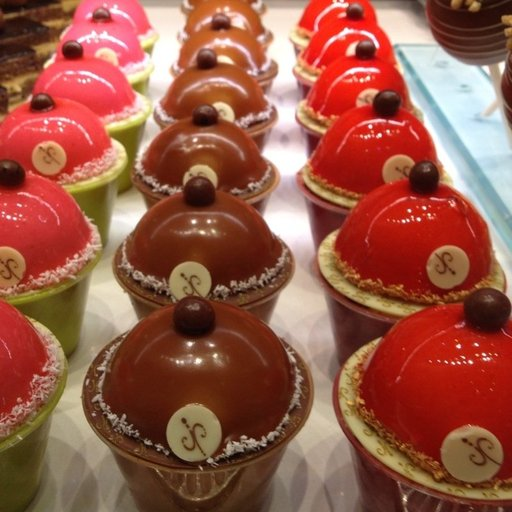

In [27]:
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
print(f"Random image path {random_image_path}")
print(f"Image class {image_class}")
print(f"Image height {img.height}")
print(f"Image width {img.width}")
img

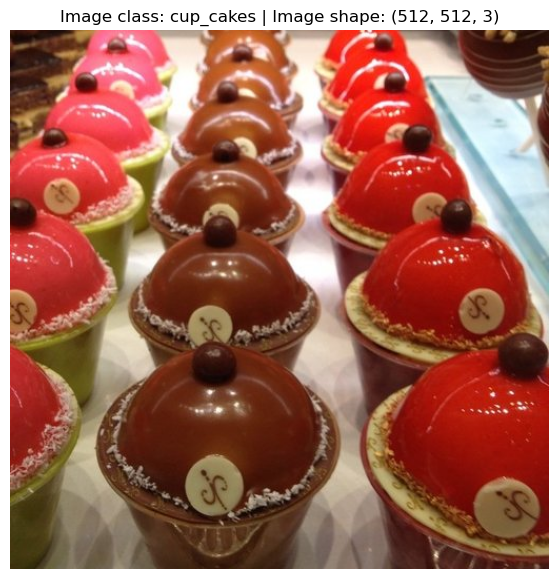

In [28]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis("off")
plt.show()

In [29]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [30]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [31]:
data_transform(img).shape

torch.Size([3, 64, 64])

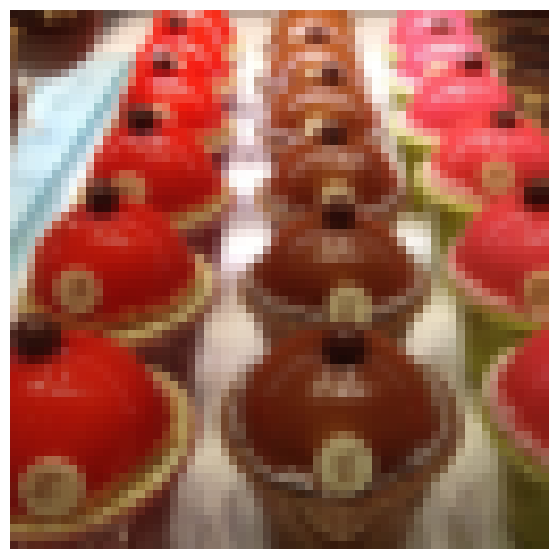

In [32]:
plt.figure(figsize=(10,7))
plt.imshow(data_transform(img).permute(1,2,0))
plt.axis("off")
plt.show()

In [33]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

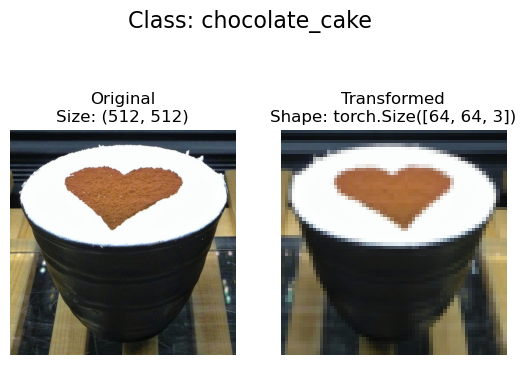

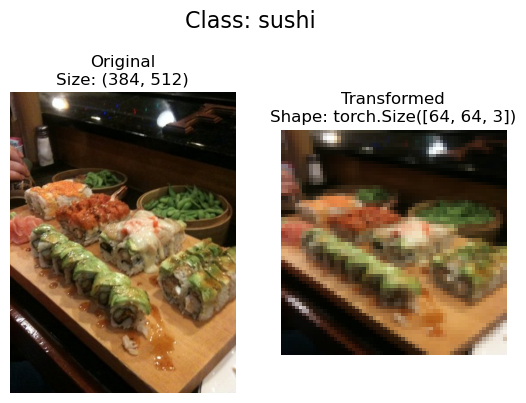

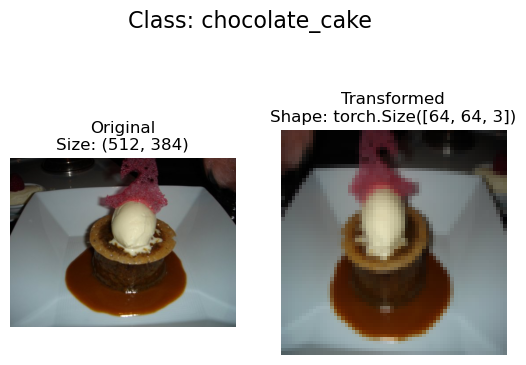

In [34]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=None)

In [35]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

In [38]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1000
     Root location: data/food_images/dataset/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 300
     Root location: data/food_images/dataset/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [39]:
class_names = train_data.classes
class_names

['chocolate_cake', 'cup_cakes', 'macarons', 'sushi']

In [40]:
len(train_data), len(test_data)

(1000, 300)